# How Do Education and Income Affect Marriage and Divorce Rates?
## Background
Recently, I hear many of my friends in China being asked to have "blind dates" by their parents, because they are at the ages which are supposed to get married. When I was little, I have heard stories that some parents asked their kids to get married when their kids reached 25 years old or so. Thus, I always know that this tradition does exist. But I still feel surprised when it happens right around me. My friends find it not reasonable to spend time having "blind dates" simply for getting married, as they have their career to focus on and they prefer to find a person who they love. However, their parents have different opinions. They think that marriage is essential as there will be a lot of difficulties and it will be very tough to face them all by ourselves, especially when we get older and our health conditions start to drop. So it's better to get things settled when we are young and healthy.

Personally, I don't believe either of them is wrong. On the side of their parents, they must be sharing the experience that makes them successful, and they wish their kids to have happier lives. On the side of my friends, they are definitely not wrong to focus on their careers and try to find their true love. So what makes them think so differently and hard to understand each other? After some thinking, I came up with one possible reason: their backgrounds are very different. During our parents' 20s, China was not as developed. They had much lower income and fewer educational resources. Besides, the country was not able to provide enough healthcare for everyone. Therefore, individuals need to rely more on their families. Nowadays, it's easier for young people to live by themselves, so young people can become more independent.

To verify my thought, I performed the analysis below. The analysis compares marriage rates and divorce rates in different countries, along with their GDP per capita and education scores, to find their inherent correlations.

## Data Source
- The marriage and divorce rates come form [OECD Family Database](http://www.oecd.org/els/family/database.htm).
- The GDP per capita comes from [The World Bank](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD).
- The education score comes from [World Population Review](https://worldpopulationreview.com/countries/education-rankings-by-country/).
- The ratios of couples who have children come from [OECD Family Database](http://www.oecd.org/els/family/database.htm).


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
marriage = pd.read_csv(r"C:\DataScience\Jupyter Files\Data Quest\Marriage and Divorce Rate\Marriage_rates.csv")
divorce = pd.read_csv(r"C:\DataScience\Jupyter Files\Data Quest\Marriage and Divorce Rate\Divorce_rates.csv")
gdp = pd.read_csv(r"C:\DataScience\Jupyter Files\Data Quest\Marriage and Divorce Rate\GDP_per_capita.csv")
education = pd.read_csv(r"C:\DataScience\Jupyter Files\Data Quest\Marriage and Divorce Rate\education.csv")

### Data cleaning

In [3]:
marriage

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,..,..,..,..,..,..,..,..,..,...,5.5,5.5,5.4,5.4,5.4,5.1,5.2,4.8,4.9,4.6
1,Austria,8.3,8.5,8.4,8.1,8.0,7.8,7.6,7.6,7.6,...,4.2,4.3,4.5,4.3,4.6,4.3,4.4,5.1,5.1,5.1
2,Belgium,7.1,6.8,6.7,6.7,6.9,7.0,7.2,7.1,7.2,...,4.3,4.0,3.9,3.7,3.8,3.4,3.6,4.0,3.9,3.9
3,Canada,7.3,7.0,7.0,6.9,7.2,7.4,7.8,8.1,8.3,...,4.4,..,..,..,..,..,..,..,..,..
4,Chile,..,..,..,..,..,..,..,..,..,...,3.3,3.3,3.5,3.8,3.7,3.5,3.6,3.4,3.4,..
5,Czech Republic,7.7,7.7,8.0,8.3,8.3,8.4,8.6,8.9,9.0,...,5.1,4.6,4.5,4.3,4.3,4.1,4.3,4.6,4.8,5.0
6,Denmark,7.8,7.9,8.1,8.2,8.4,8.8,8.6,8.5,8.1,...,6.8,6.0,5.6,4.9,5.1,4.9,5.0,5.1,5.4,5.5
7,Estonia,10.0,9.7,8.9,8.7,8.5,8.2,8.6,8.8,8.9,...,4.6,4.0,3.8,4.1,4.5,4.3,4.7,5.2,4.8,4.9
8,Finland,7.4,7.7,7.6,7.4,7.6,7.9,8.4,9.0,8.7,...,5.8,5.6,5.6,5.3,5.3,4.6,4.5,4.5,4.5,4.8
9,France,..,..,..,..,..,..,..,..,..,...,4.1,3.9,3.9,3.6,3.7,3.6,3.6,3.6,3.5,3.5


In [4]:
marriage = marriage.replace('..', np.nan)
marriage = marriage.dropna(axis=0, thresh=2) # Thresh=2 because the first column always contains information

In [5]:
marriage_no_country_column = marriage.iloc[:,1:].astype(float)
marriage_no_country_column.columns = pd.to_numeric(marriage_no_country_column.columns, errors='coerce')
marriage_no_country_column = marriage_no_country_column.interpolate(method='nearest', axis=0) # Fill NaN information by the nearest year's information

In [6]:
marriage_no_country_column

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.5,5.5,5.4,5.4,5.4,5.1,5.2,4.8,4.9,4.6
1,8.3,8.5,8.4,8.1,8.0,7.8,7.6,7.6,7.6,7.3,...,4.2,4.3,4.5,4.3,4.6,4.3,4.4,5.1,5.1,5.1
2,7.1,6.8,6.7,6.7,6.9,7.0,7.2,7.1,7.2,7.5,...,4.3,4.0,3.9,3.7,3.8,3.4,3.6,4.0,3.9,3.9
3,7.3,7.0,7.0,6.9,7.2,7.4,7.8,8.1,8.3,8.7,...,4.4,4.0,3.9,3.7,3.8,3.4,3.6,4.0,3.9,3.9
4,7.3,7.0,7.0,6.9,7.2,7.4,7.8,8.1,8.3,8.7,...,3.3,3.3,3.5,3.8,3.7,3.5,3.6,3.4,3.4,5.0
5,7.7,7.7,8.0,8.3,8.3,8.4,8.6,8.9,9.0,9.1,...,5.1,4.6,4.5,4.3,4.3,4.1,4.3,4.6,4.8,5.0
6,7.8,7.9,8.1,8.2,8.4,8.8,8.6,8.5,8.1,8.0,...,6.8,6.0,5.6,4.9,5.1,4.9,5.0,5.1,5.4,5.5
7,10.0,9.7,8.9,8.7,8.5,8.2,8.6,8.8,8.9,9.1,...,4.6,4.0,3.8,4.1,4.5,4.3,4.7,5.2,4.8,4.9
8,7.4,7.7,7.6,7.4,7.6,7.9,8.4,9.0,8.7,8.8,...,5.8,5.6,5.6,5.3,5.3,4.6,4.5,4.5,4.5,4.8
9,7.4,7.7,7.6,7.4,7.6,7.9,8.4,9.0,8.7,8.8,...,4.1,3.9,3.9,3.6,3.7,3.6,3.6,3.6,3.5,3.5


In [7]:
marriage_rate = pd.DataFrame()

In [8]:
marriage_rate['country'] = marriage['Country']
marriage_rate['marriage_rate'] = marriage_no_country_column[2017]
marriage_rate

,country,marriage_rate
0,Australia,4.6
1,Austria,5.1
2,Belgium,3.9
3,Canada,3.9
4,Chile,5.0
5,Czech Republic,5.0
6,Denmark,5.5
7,Estonia,4.9
8,Finland,4.8
9,France,3.5


In [9]:
divorce

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,..,..,..,..,..,..,..,..,..,...,2.2,2.3,2.3,2.2,2.2,2.1,2.0,2.0,1.9,2.0
1,Austria,1.1,1.1,1.1,1.1,1.2,1.2,1.2,1.2,1.3,...,2.4,2.3,2.1,2.1,2.0,1.9,1.9,1.9,1.8,1.8
2,Belgium,0.5,0.5,0.5,0.6,0.6,0.6,0.6,0.6,0.6,...,3.3,3.0,2.7,2.5,2.3,2.2,2.2,2.2,2.1,2.0
3,Canada,..,..,..,..,..,..,..,..,..,...,2.1,..,..,..,..,..,..,..,..,..
4,Chile,..,..,..,..,..,..,..,..,..,...,0.1,0.1,0.1,..,..,..,..,..,..,..
5,Czech Republic,1.4,1.5,1.5,1.5,1.5,1.7,1.8,1.8,1.9,...,3.0,2.8,2.9,2.7,2.5,2.7,2.5,2.5,2.4,2.4
6,Denmark,1.5,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.6,...,2.7,2.7,2.6,2.6,2.8,3.4,3.4,2.9,3.0,2.6
7,Estonia,2.1,2.1,2.0,2.2,2.5,2.3,3.2,3.2,3.1,...,2.6,2.4,2.2,2.3,2.4,2.5,2.4,2.6,2.5,2.5
8,Finland,0.8,0.9,0.9,0.9,1.0,1.0,1.1,1.1,1.2,...,2.5,2.5,2.5,2.5,2.4,2.5,2.5,2.5,2.5,2.4
9,France,..,..,..,..,..,..,..,..,..,...,2.1,2.0,2.1,2.0,2.0,1.9,1.9,1.9,1.9,..


In [10]:
divorce = divorce.replace('..', np.nan)
divorce = divorce.dropna(axis=0, thresh=2)  # Thresh=2 because the first column always contains information

In [11]:
divorce_no_country_column = divorce.iloc[:,1:].astype(float)
divorce_no_country_column.columns = pd.to_numeric(divorce_no_country_column.columns, errors='coerce')
divorce_no_country_column = divorce_no_country_column.interpolate(method='nearest', axis=0) # Fill NaN information by the nearest year's information
divorce_no_country_column

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.2,2.3,2.3,2.2,2.2,2.1,2.0,2.0,1.9,2.0
1,1.1,1.1,1.1,1.1,1.2,1.2,1.2,1.2,1.3,1.3,...,2.4,2.3,2.1,2.1,2.0,1.9,1.9,1.9,1.8,1.8
2,0.5,0.5,0.5,0.6,0.6,0.6,0.6,0.6,0.6,0.7,...,3.3,3.0,2.7,2.5,2.3,2.2,2.2,2.2,2.1,2.0
3,0.5,0.5,0.5,0.6,0.6,0.6,0.6,0.6,0.6,0.7,...,2.1,3.0,2.7,2.5,2.3,2.2,2.2,2.2,2.1,2.0
4,1.4,1.5,1.5,1.5,1.5,1.7,1.8,1.8,1.9,2.1,...,0.1,0.1,0.1,2.7,2.5,2.7,2.5,2.5,2.4,2.4
5,1.4,1.5,1.5,1.5,1.5,1.7,1.8,1.8,1.9,2.1,...,3.0,2.8,2.9,2.7,2.5,2.7,2.5,2.5,2.4,2.4
6,1.5,1.4,1.4,1.4,1.4,1.4,1.4,1.4,1.6,1.8,...,2.7,2.7,2.6,2.6,2.8,3.4,3.4,2.9,3.0,2.6
7,2.1,2.1,2.0,2.2,2.5,2.3,3.2,3.2,3.1,3.3,...,2.6,2.4,2.2,2.3,2.4,2.5,2.4,2.6,2.5,2.5
8,0.8,0.9,0.9,0.9,1.0,1.0,1.1,1.1,1.2,1.3,...,2.5,2.5,2.5,2.5,2.4,2.5,2.5,2.5,2.5,2.4
9,0.8,0.9,0.9,0.9,1.0,1.0,1.1,1.1,1.2,1.3,...,2.1,2.0,2.1,2.0,2.0,1.9,1.9,1.9,1.9,2.4


In [12]:
divorce_rate = pd.DataFrame()
divorce_rate['country'] = divorce['Country']
divorce_rate['divorce_rate'] = divorce_no_country_column[2017]
divorce_rate

,country,divorce_rate
0,Australia,2.0
1,Austria,1.8
2,Belgium,2.0
3,Canada,2.0
4,Chile,2.4
5,Czech Republic,2.4
6,Denmark,2.6
7,Estonia,2.5
8,Finland,2.4
9,France,2.4


In [13]:
gdp

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.453710,23512.602600,24985.993280,24713.698050,25025.099560,25533.569780,25796.380250,25239.600410,25630.266490,NaN
1,Afghanistan,59.773194,59.860874,58.458015,78.706388,82.095231,101.108305,137.594352,160.898589,129.108323,...,438.076034,543.303042,591.162347,641.872034,637.165044,613.856333,578.466353,547.228110,556.302138,520.896603
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3122.780766,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3432.385736
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.140150,4094.362119,4437.178067,4247.614279,4413.081743,4578.666720,3952.829458,4124.108907,4532.890162,5268.848504
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43338.866760,39736.354060,41100.729940,38392.943900,40626.751630,42300.334130,36039.653500,37224.108920,39134.393370,42029.762740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3209.711460,3283.483451,3736.700833,3600.575965,3876.970676,4054.716970,3574.241120,3697.129595,3948.052670,4302.276483
260,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1116.084594,1334.784845,1374.621313,1446.536280,1607.152275,1674.002766,1608.744312,1139.870568,963.494721,944.408499
261,South Africa,443.009816,454.962013,473.011615,511.497253,548.995942,584.704072,621.220825,675.135312,711.225810,...,5862.797340,7328.615629,8007.412846,7501.469984,6832.456891,6433.187277,5734.633629,5272.918425,6132.479841,6374.028196
262,Zambia,232.188867,220.042137,212.578123,213.896441,242.384333,303.281910,343.373484,360.201618,409.775349,...,1159.907762,1489.459070,1672.949830,1763.094184,1878.903489,1763.056239,1337.796315,1280.578447,1534.865371,1539.900158


In [14]:
gdp = gdp.dropna(axis=0, thresh=2) # Thresh=2 because the first column always contains information
gdp_no_country_column = gdp.iloc[:,1:].astype(float) 
gdp_no_country_column.columns = pd.to_numeric(gdp_no_country_column.columns, errors='coerce') 
gdp_no_country_column = gdp_no_country_column.interpolate(method='nearest', axis=0) # Fill NaN information by the nearest year's information

In [15]:
gdp_per_capita = pd.DataFrame()
gdp_per_capita['country'] = gdp['Country Name']
gdp_per_capita['gdp_per_capita'] = gdp_no_country_column[2017]
gdp_per_capita

,country,gdp_per_capita
0,Aruba,25630.266490
1,Afghanistan,556.302138
2,Angola,4095.812942
3,Albania,4532.890162
4,Andorra,39134.393370
...,...,...
259,Kosovo,3948.052670
260,"Yemen, Rep.",963.494721
261,South Africa,6132.479841
262,Zambia,1534.865371


In [16]:
education

,name,totalScore,readingScore,mathScore,scienceScore
0,China,1731,556,600,575
1,Hong Kong,1637,533,555,549
2,Finland,1631,536,541,554
3,Singapore,1630,526,562,542
4,Japan,1588,520,529,539
...,...,...,...,...,...
58,Albania,1153,385,377,391
59,Qatar,1119,372,368,379
60,Panama,1107,371,360,376
61,Peru,1104,370,365,369


In [17]:
education = education[['name', 'totalScore']] # Only the total score is used for analysis
education.columns = ['country', 'total_education_score']
education

,country,total_education_score
0,China,1731
1,Hong Kong,1637
2,Finland,1631
3,Singapore,1630
4,Japan,1588
...,...,...
58,Albania,1153
59,Qatar,1119
60,Panama,1107
61,Peru,1104


### Data Analysis

In [18]:
df = marriage_rate.merge(divorce_rate, how='inner', on='country').merge(gdp_per_capita, how='inner', on='country').merge(education, how='inner', on='country')
df

,country,marriage_rate,divorce_rate,gdp_per_capita,total_education_score
0,Australia,4.6,2.0,54066.471270,1556
1,Austria,5.1,1.8,47431.630610,1460
2,Belgium,3.9,2.0,44219.562000,1528
3,Canada,3.9,2.0,45069.927250,1580
4,Chile,5.0,2.4,15037.350280,1317
5,Czech Republic,5.0,2.4,20379.896040,1471
6,Denmark,5.5,2.6,57141.059840,1497
7,Estonia,4.9,2.5,20337.849730,1541
8,Finland,4.8,2.4,46191.931160,1631
9,France,3.5,2.4,38679.127150,1491


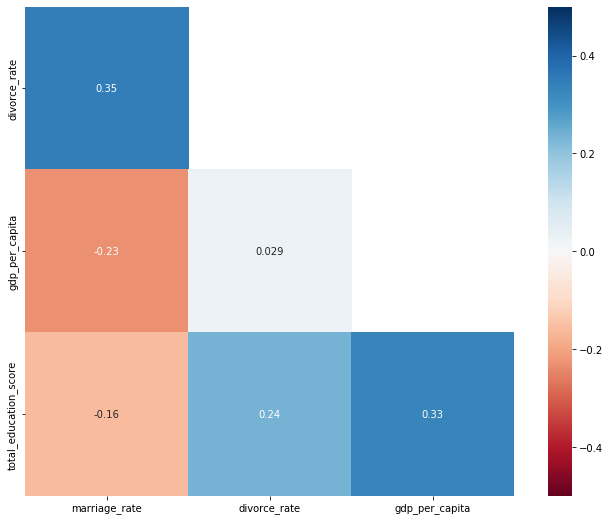

In [19]:
corr = df.corr()
corr = corr.iloc[1:, :-1]
mask = np.triu(np.ones_like(corr), k=1)
plt.figure(figsize=(12,9))
ax=sns.heatmap(corr, vmin=-0.5, vmax=0.5, cmap='RdBu', mask=mask, annot=True, square=True)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
ax.set_yticklabels(['divorce_rate', 'gdp_per_capita', 'total_education_score'], rotation=90, va="center")
plt.show()

As shown from the above heatmap, some intuitive correlations can be found. The marriage rates have a positive correlation with the divorce rates. This makes sense as divorce must after when marriage happens. Total education score has a positive correlation with GDP per capita. This also reflects the truth that higher education results in higher income on average.

More interestingly, marriage rates have negative correlations with GDP per capita and total education score. This finding verifies my hypothesis that people who live in a country with more gross income and educational resources are more independent. Another suprising observation is that divorce rate is independent of the GDP per capita, but has a positive correlation with education score. This means that country with citizens who accept more education tend to have higher divorce rate. This is counter-intuitive to me as I thought that people with better education will have greater chances to find good partners, and the divorce rate should be lower. One plausible explaination could be that people with higher education may have less willing to have children. [Study](https://www.wf-lawyers.com/divorce-statistics-and-facts/) has shown that couples with children have significant less divorce rate than couples without children.

In [20]:
child = pd.read_excel(r"C:\DataScience\Jupyter Files\Data Quest\Marriage and Divorce Rate\Families_Children.xlsx")

In [21]:
child

,country,Total,With children,Without children
0,Australia (c),56.9535,31.035,25.9185
1,Austria,50.1126,23.1351,26.9775
2,Belgium,53.1862,24.7961,28.3901
3,Canada (d),56.0068,26.4621,29.5447
4,Chile,..,..,..
5,Czech Republic,47.924,22.1892,25.7348
6,Denmark,50.1277,22.2185,27.9092
7,Estonia,43.6847,21.0232,22.6615
8,Finland,49.4273,20.5001,28.9272
9,France,54.1177,25.6299,28.4878


In [22]:
child['country'] = child['country'].str.replace(r'\(.+\)', '')
child = child.replace('..', np.nan)
child = child.dropna(axis=0, thresh=2)

In [23]:
child['with_children_ratio'] = child['With children'].astype(float)/child['Total'].astype(float)
child = child[['country', 'with_children_ratio']]
child

,country,with_children_ratio
0,Australia,0.544918
1,Austria,0.461662
2,Belgium,0.466213
3,Canada,0.472480
5,Czech Republic,0.463008
6,Denmark,0.443238
7,Estonia,0.481249
8,Finland,0.414753
9,France,0.473596
10,Germany,0.397710


In [24]:
education_child = education.merge(child, how='inner', on='country')

In [25]:
corr = education_child.corr()
corr = corr.iloc[1:, :-1]
corr

,total_education_score
with_children_ratio,-0.209835


As shown from the above table, education score indeed has a negative correlation with the ratio of couples who have children. Therefore, this is likely to be the reason why education score has a positive correlation with the divorce rate.

## Conclusion
In this project, I studied how GDP per capita and education influence the marriage rates and divorce rates. It was found that GDP per capita and education score have negative correlations with the marriage rates. The divorce rates are independent of GDP per capita, but have a positive correlation with the education score. The positive correlation between divorce rates and the education score was explained by a negative correlation between the education score and the ratio of couples who have children. 